In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as s
import numpy as np
from datetime import datetime

# pd.set_option('display.max_rows', None) # code to not truncate dataframe when it is displayed



In [2]:
df = pd.read_csv("Resources/Data_Clean_hosp.csv")

df.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,7184,AUT,Europe,Austria,2020-02-25,2.0,2.0,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
1,7185,AUT,Europe,Austria,2020-02-26,2.0,0.0,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
2,7186,AUT,Europe,Austria,2020-02-27,3.0,1.0,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
3,7187,AUT,Europe,Austria,2020-02-28,3.0,0.0,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
4,7188,AUT,Europe,Austria,2020-02-29,9.0,6.0,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN


In [3]:
#changing date from string to datetime object
df["date"] = pd.to_datetime(df["date"],format='%Y-%m-%d')

type(df.iloc[0,4])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
#listing all columns

for _ in df.columns:
    print(_)

Unnamed: 0
iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
new_tests
total_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_hundred
new_vaccinations_smoothed_per_million
stringency_index
population
population_density
median_age
age

In [5]:
df.columns

Index(['Unnamed: 0', 'iso_code', 'continent', 'location', 'date',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smooth

In [6]:
df_vax_hosp_icu = df[['iso_code',
                    'continent', 
                    'location', 
                    'date',
                    'total_cases', 
                    'new_cases', 
                    'total_deaths',
                    'new_deaths',
                    'icu_patients',
                    'hosp_patients',
                    'weekly_icu_admissions',
                       'weekly_hosp_admissions',
                       'new_tests', 
                      'total_tests',
                       'positive_rate',
                      'total_vaccinations',
                       'people_vaccinated', 
                      'people_fully_vaccinated',
                      'total_boosters',
                       'new_vaccinations',
                       'population',
                      'hospital_beds_per_thousand',
                       'excess_mortality_cumulative_absolute',
                      'excess_mortality_cumulative',
                       'excess_mortality']]

In [7]:
df_vax_hosp_icu

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,hospital_beds_per_thousand,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
0,AUT,Europe,Austria,2020-02-25,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9043072.0,7.37,NaN,NaN,NaN
1,AUT,Europe,Austria,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9043072.0,7.37,NaN,NaN,NaN
2,AUT,Europe,Austria,2020-02-27,3.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9043072.0,7.37,NaN,NaN,NaN
3,AUT,Europe,Austria,2020-02-28,3.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9043072.0,7.37,NaN,NaN,NaN
4,AUT,Europe,Austria,2020-02-29,9.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9043072.0,7.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15413,USA,North America,United States,2021-10-16,44916737.0,32139.0,723765.0,397.0,16435.0,51706.0,...,407446961.0,218562924.0,188902483.0,10114824.0,876086.0,332915074.0,2.77,NaN,NaN,NaN
15414,USA,North America,United States,2021-10-17,44934357.0,17620.0,724110.0,345.0,16274.0,51361.0,...,408265959.0,218805579.0,189141481.0,10461286.0,818998.0,332915074.0,2.77,NaN,NaN,NaN
15415,USA,North America,United States,2021-10-18,45050910.0,116553.0,725835.0,1725.0,16375.0,51394.0,...,408797942.0,218973123.0,189292559.0,10681175.0,531983.0,332915074.0,2.77,NaN,NaN,NaN
15416,USA,North America,United States,2021-10-19,45132148.0,81238.0,728192.0,2357.0,16266.0,50832.0,...,409438987.0,219161368.0,189487793.0,10926564.0,641045.0,332915074.0,2.77,NaN,NaN,NaN


In [8]:
#listing all countries

countries = df["location"].unique()

print(f"This analysis involves data from {len(countries)} countries\n")

print(f"These countires are \n")

for x in countries:
    print(x)

This analysis involves data from 25 countries

These countires are 

Austria
Belgium
Bulgaria
Canada
Cyprus
Czechia
Denmark
Estonia
Finland
France
Germany
Ireland
Israel
Italy
Luxembourg
Malta
Netherlands
Portugal
Serbia
Slovenia
Spain
Sweden
Switzerland
United Kingdom
United States


In [124]:
#Reducing down the number of columns for this analysis
df1 = df[["location","date","people_fully_vaccinated","new_cases","hosp_patients","icu_patients","new_deaths"]]

df1

,location,date,people_fully_vaccinated,new_cases,hosp_patients,icu_patients,new_deaths
0,Austria,2020-02-25,NaN,2.0,NaN,NaN,NaN
1,Austria,2020-02-26,NaN,0.0,NaN,NaN,NaN
2,Austria,2020-02-27,NaN,1.0,NaN,NaN,NaN
3,Austria,2020-02-28,NaN,0.0,NaN,NaN,NaN
4,Austria,2020-02-29,NaN,6.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
15413,United States,2021-10-16,188902483.0,32139.0,51706.0,16435.0,397.0
15414,United States,2021-10-17,189141481.0,17620.0,51361.0,16274.0,345.0
15415,United States,2021-10-18,189292559.0,116553.0,51394.0,16375.0,1725.0
15416,United States,2021-10-19,189487793.0,81238.0,50832.0,16266.0,2357.0


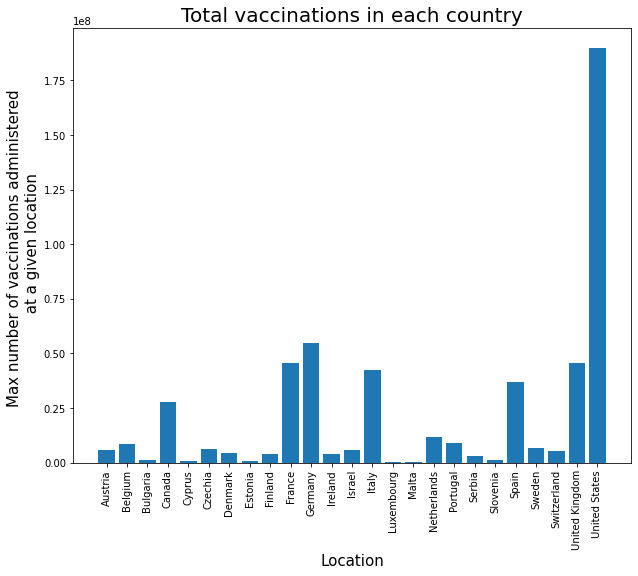

Based on the selected dataset, top countries with highest number of /n vvaccinations administered include US, UK, Spain, Italy, Germany, France and Canada


In [123]:
#Bar chart to show total number of vaccinations administered in a country
df1_grouped_location = df1.groupby(["location"]).max()

countries = df1["location"].unique()
total_vaccinations = df1_grouped_location["people_fully_vaccinated"]

plt.figure(figsize=(10,8))
plt.bar(countries,total_vaccinations)
plt.xticks(rotation="vertical")

# Set a Title and labels
plt.title("Total vaccinations in each country", fontsize = 20)
plt.xlabel("Location", fontsize = 15)
plt.ylabel("Max number of vaccinations administered \n at a given location", fontsize = 15)

# Save our graph and show the grap
plt.savefig("Output_Images/vaccinations_vs_location.png")
plt.show()

print(f"Based on the selected dataset, top countries with highest number of /n vvaccinations administered include US, UK, Spain, Italy, Germany, France and Canada")



In [16]:
#looking at stats. A few negative number of cases??
df1.describe()

,people_fully_vaccinated,new_cases,hosp_patients,icu_patients,new_deaths
count,5.911000e+03,15292.000000,13410.000000,13722.000000,14697.000000
mean,1.126427e+07,5942.521318,4688.137882,953.054511,103.362183
std,2.836226e+07,20505.643575,12711.078678,2976.329854,331.988277
min,1.000000e+00,-74347.000000,0.000000,0.000000,-1918.000000
25%,3.445340e+05,99.000000,119.000000,23.000000,1.000000
50%,1.499547e+06,590.000000,583.500000,121.000000,7.000000
75%,5.681000e+06,3207.500000,2833.750000,522.000000,49.000000
max,1.897097e+08,303008.000000,133253.000000,28891.000000,4441.000000


In [127]:
#groupby week and location

df1_week = df1.groupby(['location', pd.Grouper(key='date', freq='W-MON')])

df1_week = df1_week.mean().reset_index().sort_values(['location', 'date'])

df1_week

,location,date,people_fully_vaccinated,new_cases,hosp_patients,icu_patients,new_deaths
0,Austria,2020-03-02,NaN,2.571429,NaN,NaN,NaN
1,Austria,2020-03-09,NaN,16.142857,NaN,NaN,NaN
2,Austria,2020-03-16,NaN,126.714286,NaN,NaN,0.600000
3,Austria,2020-03-23,NaN,493.714286,NaN,NaN,2.571429
4,Austria,2020-03-30,NaN,734.857143,NaN,NaN,12.428571
...,...,...,...,...,...,...,...
2243,United States,2021-09-27,1.829799e+08,117207.428571,77549.571429,22278.285714,2055.857143
2244,United States,2021-10-04,1.850356e+08,105054.000000,67578.714286,19533.428571,1801.428571
2245,United States,2021-10-11,1.866395e+08,86304.285714,59936.714286,17785.428571,1479.142857
2246,United States,2021-10-18,1.885608e+08,84932.142857,53596.000000,17006.428571,1662.571429


In [18]:
df1_week.describe()

,people_fully_vaccinated,new_cases,hosp_patients,icu_patients,new_deaths
count,1.005000e+03,2213.000000,2057.000000,2028.000000,2127.000000
mean,1.052451e+07,5932.997458,4618.107472,948.371028,103.197379
std,2.726653e+07,19495.544734,12363.397601,2949.084355,313.011705
min,1.000000e+00,-6223.000000,0.000000,0.000000,-125.000000
25%,3.286090e+05,146.000000,121.142857,22.714286,1.714286
50%,1.476305e+06,709.857143,595.571429,116.071429,8.428571
75%,5.681526e+06,3508.857143,3005.285714,528.142857,53.000000
max,1.895988e+08,251863.571429,127988.714286,28469.714286,3306.285714


In [93]:
# Daily data for the US - all 66 columns included
df_USA = df_week[df_week["location"]=="United States"]

df_USA

,location,date,Unnamed: 0,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
2156,United States,2020-01-27,118558.5,2.666667e+00,0.800000,NaN,NaN,NaN,NaN,0.008000,...,19.1,24.6,NaN,2.77,78.86,0.926,-9154.1,-3.68,-3.08,-27.496802
2157,United States,2020-02-03,118565.0,7.428571e+00,0.857143,0.714143,NaN,NaN,0.000000,0.022286,...,19.1,24.6,NaN,2.77,78.86,0.926,-10709.5,-3.47,-2.58,-32.168865
2158,United States,2020-02-10,118572.0,1.171429e+01,0.142857,0.612000,NaN,NaN,0.000000,0.035143,...,19.1,24.6,NaN,2.77,78.86,0.926,-11890.1,-3.22,-1.95,-35.715115
2159,United States,2020-02-17,118579.0,1.371429e+01,0.285714,0.286000,NaN,NaN,0.000000,0.041143,...,19.1,24.6,NaN,2.77,78.86,0.926,-13222.7,-3.08,-2.22,-39.717937
2160,United States,2020-02-24,118586.0,1.514286e+01,0.285714,0.204286,NaN,NaN,0.000000,0.045429,...,19.1,24.6,NaN,2.77,78.86,0.926,-13817.9,-2.82,-1.00,-41.505781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,United States,2021-09-27,119167.0,4.277810e+07,117207.428571,124416.408143,686089.571429,2055.857143,2057.306143,128495.521714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2244,United States,2021-10-04,119174.0,4.354976e+07,105054.000000,110238.040857,699402.428571,1801.428571,1901.836714,130813.429000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2245,United States,2021-10-11,119181.0,4.422426e+07,86304.285714,96357.102143,711002.714286,1479.142857,1657.183571,132839.470571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2246,United States,2021-10-18,119188.0,4.482910e+07,84932.142857,86405.898143,722112.571429,1662.571429,1587.122429,134656.274000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [126]:
#groupby week and location for df dataset

df_week = df.groupby(['location', pd.Grouper(key='date', freq='W-MON')])

df_week = df_week.mean().reset_index().sort_values(['location', 'date'])

df_week

,location,date,Unnamed: 0,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Austria,2020-03-02,7187.0,7.285714e+00,2.571429,2.285500,NaN,NaN,0.000000,0.805571,...,28.4,30.9,NaN,7.37,81.54,0.922,-749.0,-4.55,-3.64,-82.825836
1,Austria,2020-03-09,7194.0,6.571429e+01,16.142857,8.347000,NaN,NaN,0.000000,7.266857,...,28.4,30.9,NaN,7.37,81.54,0.922,-777.8,-4.26,-1.62,-86.010595
2,Austria,2020-03-16,7201.0,5.381429e+02,126.714286,67.489857,1.400000,0.600000,0.143000,59.508714,...,28.4,30.9,NaN,7.37,81.54,0.922,-790.4,-3.96,-0.73,-87.403926
3,Austria,2020-03-23,7208.0,2.607000e+03,493.714286,295.551143,9.142857,2.571429,1.163143,288.286857,...,28.4,30.9,NaN,7.37,81.54,0.922,-571.6,-2.65,13.53,-63.208609
4,Austria,2020-03-30,7215.0,7.444857e+03,734.857143,691.122429,61.000000,12.428571,7.408143,823.266571,...,28.4,30.9,NaN,7.37,81.54,0.922,-471.6,-2.03,6.01,-52.150420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,United States,2021-09-27,119167.0,4.277810e+07,117207.428571,124416.408143,686089.571429,2055.857143,2057.306143,128495.521714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2244,United States,2021-10-04,119174.0,4.354976e+07,105054.000000,110238.040857,699402.428571,1801.428571,1901.836714,130813.429000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2245,United States,2021-10-11,119181.0,4.422426e+07,86304.285714,96357.102143,711002.714286,1479.142857,1657.183571,132839.470571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2246,United States,2021-10-18,119188.0,4.482910e+07,84932.142857,86405.898143,722112.571429,1662.571429,1587.122429,134656.274000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [32]:
#daily data for the US
df2_USA = df1[df1["location"]=="United States"]

df2_USA

,location,date,people_fully_vaccinated,new_cases,hosp_patients,icu_patients,new_deaths
14780,United States,2020-01-22,NaN,NaN,NaN,NaN,NaN
14781,United States,2020-01-23,NaN,0.0,NaN,NaN,NaN
14782,United States,2020-01-24,NaN,1.0,NaN,NaN,NaN
14783,United States,2020-01-25,NaN,0.0,NaN,NaN,NaN
14784,United States,2020-01-26,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
15413,United States,2021-10-16,188902483.0,32139.0,51706.0,16435.0,397.0
15414,United States,2021-10-17,189141481.0,17620.0,51361.0,16274.0,345.0
15415,United States,2021-10-18,189292559.0,116553.0,51394.0,16375.0,1725.0
15416,United States,2021-10-19,189487793.0,81238.0,50832.0,16266.0,2357.0


In [20]:
#Daily data converted to weekly data for the US
df1_USA = df1_week[df1_week["location"]=="United States"]

df1_USA

,location,date,people_fully_vaccinated,new_cases,hosp_patients,icu_patients,new_deaths
2156,United States,2020-01-27,NaN,0.800000,NaN,NaN,NaN
2157,United States,2020-02-03,NaN,0.857143,NaN,NaN,NaN
2158,United States,2020-02-10,NaN,0.142857,NaN,NaN,NaN
2159,United States,2020-02-17,NaN,0.285714,NaN,NaN,NaN
2160,United States,2020-02-24,NaN,0.285714,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2243,United States,2021-09-27,1.829799e+08,117207.428571,77549.571429,22278.285714,2055.857143
2244,United States,2021-10-04,1.850356e+08,105054.000000,67578.714286,19533.428571,1801.428571
2245,United States,2021-10-11,1.866395e+08,86304.285714,59936.714286,17785.428571,1479.142857
2246,United States,2021-10-18,1.885608e+08,84932.142857,53596.000000,17006.428571,1662.571429


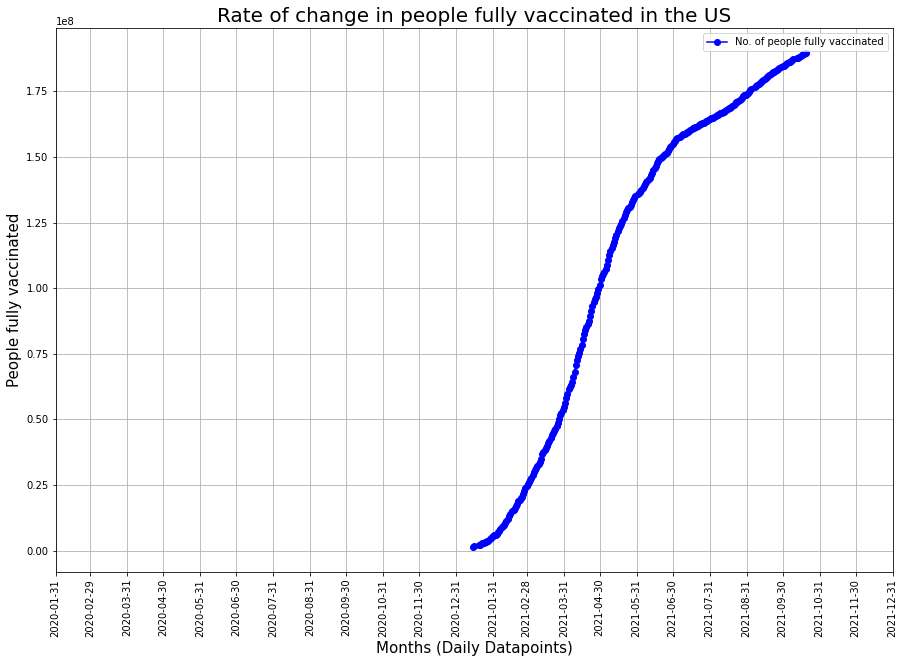

In [87]:
#plot to demostrate rate of change in number of vaccinations for USA

x_axis1 = df2_USA["date"]
y_axis1 = df2_USA["people_fully_vaccinated"]

plt.figure(figsize=(15,10))
plt.plot(x_axis1,y_axis1, marker ='o', color='blue', label="No. of people fully vaccinated")
plt.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("Rate of change in people fully vaccinated in the US", fontsize = 20)
plt.xlabel("Months (Daily Datapoints)", fontsize = 15)
plt.ylabel("People fully vaccinated", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot06_USA.png")
plt.show()

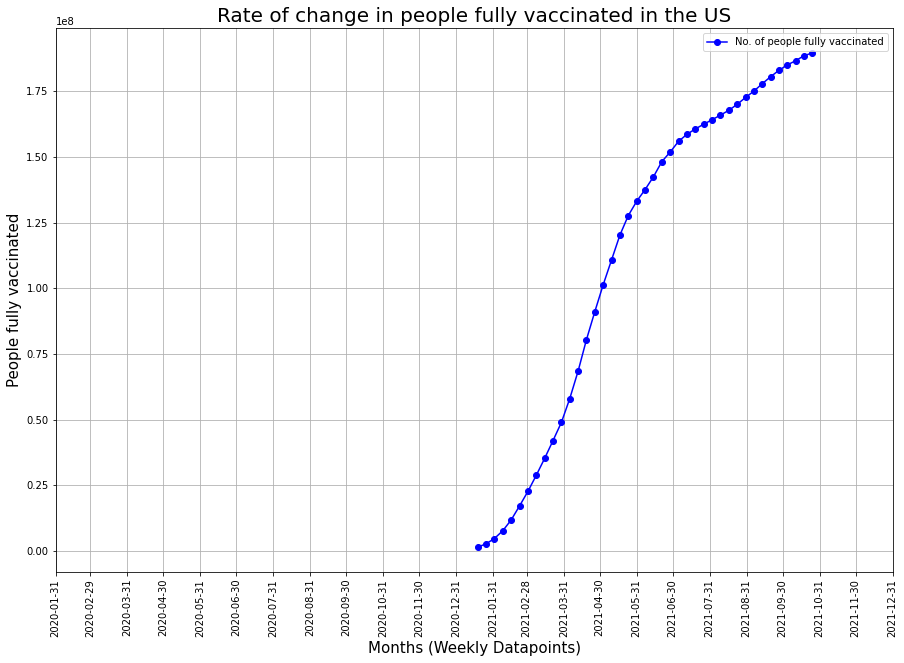

In [128]:
#plot to demostrate rate of change in number of vaccinations for USA

x_axis1 = df1_USA["date"]
y_axis1 = df1_USA["people_fully_vaccinated"]

plt.figure(figsize=(15,10))
plt.plot(x_axis1,y_axis1, marker ='o', color='blue', label="No. of people fully vaccinated")
plt.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("Rate of change in people fully vaccinated in the US", fontsize = 20)
plt.xlabel("Months (Weekly Datapoints)", fontsize = 15)
plt.ylabel("People fully vaccinated", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot01_USA.png")
plt.show()


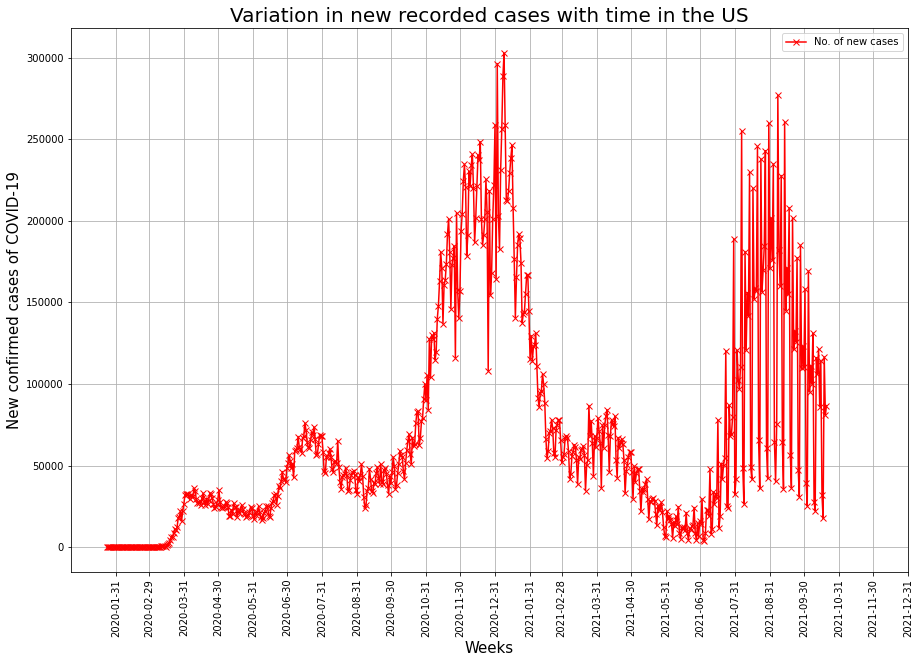

In [59]:
#plot to demostrate variation in new cases with time in the US

x_axis2 = df2_USA["date"]
y_axis2 = df2_USA["new_cases"]

plt.figure(figsize=(15,10))
plt.plot(x_axis2,y_axis2, marker ='x', color='red', label= "No. of new cases")
plt.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("Variation in new recorded cases with time in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("New confirmed cases of COVID-19", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot7_USA.png")
plt.show()

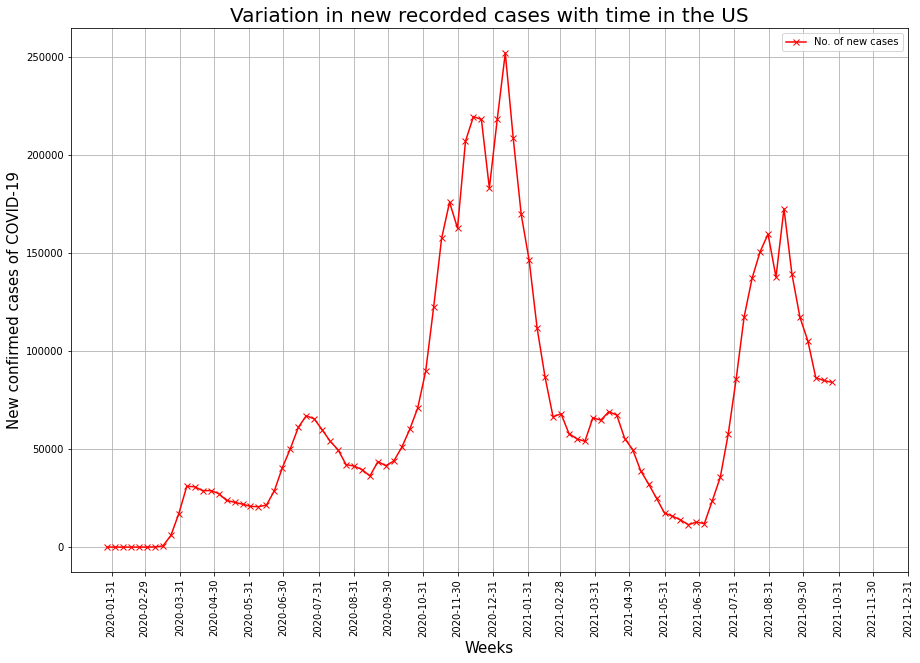

In [129]:
#plot to demostrate variation in new cases with time in the US

x_axis2 = df1_USA["date"]
y_axis2 = df1_USA["new_cases"]

plt.figure(figsize=(15,10))
plt.plot(x_axis2,y_axis2, marker ='x', color='red', label= "No. of new cases")
plt.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")
# Create title and labels for the X and Y axis
plt.title("Variation in new recorded cases with time in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("New confirmed cases of COVID-19", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot2_USA.png")
plt.show()

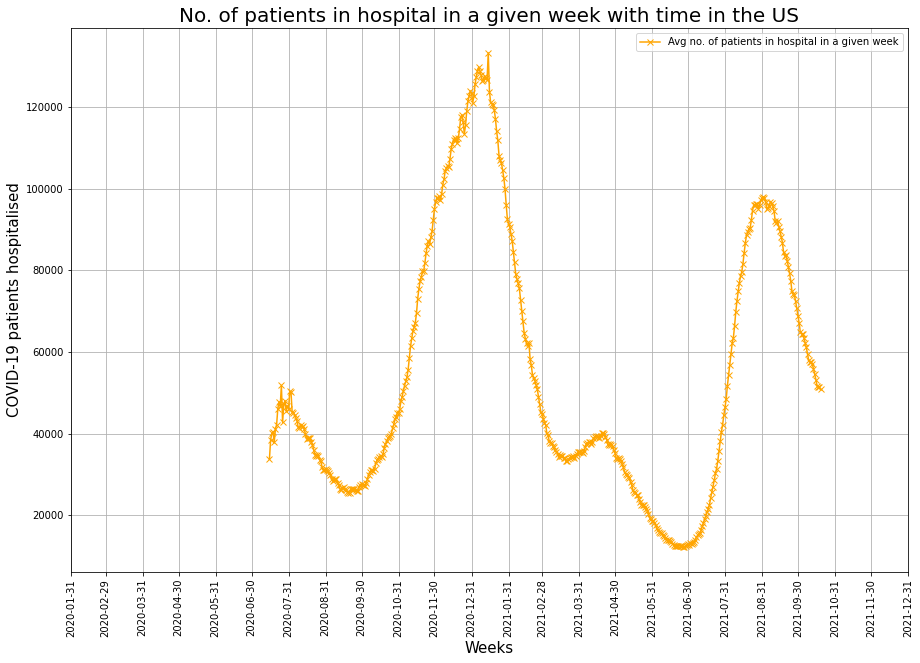

In [130]:
#plot to demostrate no. of patients in hospital in a given week with time in the US

x_axis3 = df2_USA["date"]
y_axis3 = df2_USA["hosp_patients"]

plt.figure(figsize=(15,10))
plt.plot(x_axis3,y_axis3, marker ='x', color='orange', label= "Avg no. of patients in hospital in a given week")
plt.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("No. of patients in hospital in a given week with time in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("COVID-19 patients hospitalised", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot8_USA.png")
plt.show()

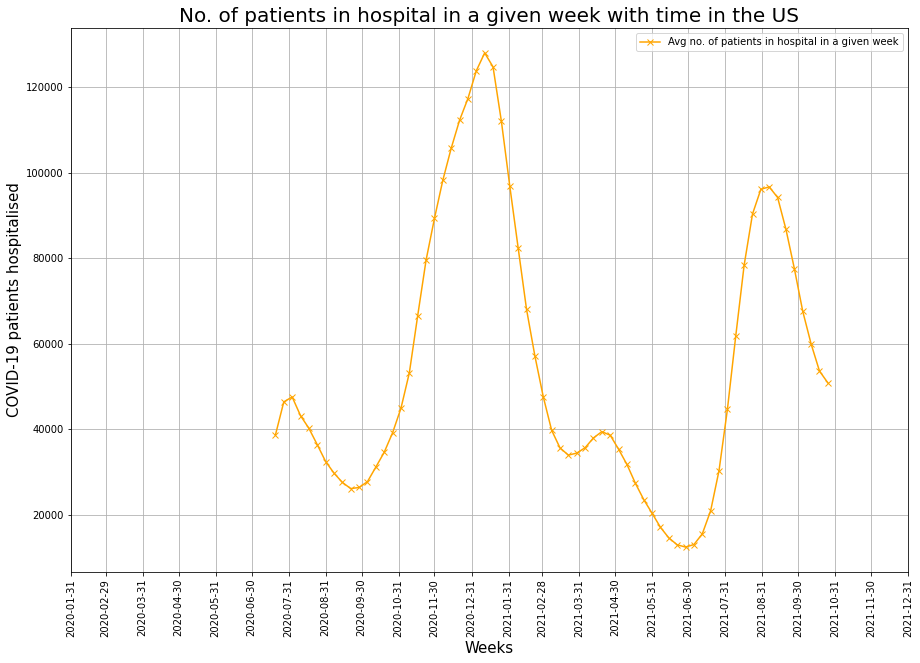

In [131]:
#plot to demostrate no. of patients in hospital in a given week with time in the US

x_axis3 = df1_USA["date"]
y_axis3 = df1_USA["hosp_patients"]

plt.figure(figsize=(15,10))
plt.plot(x_axis3,y_axis3, marker ='x', color='orange', label= "Avg no. of patients in hospital in a given week")
plt.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("No. of patients in hospital in a given week with time in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("COVID-19 patients hospitalised", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot3_USA.png")
plt.show()

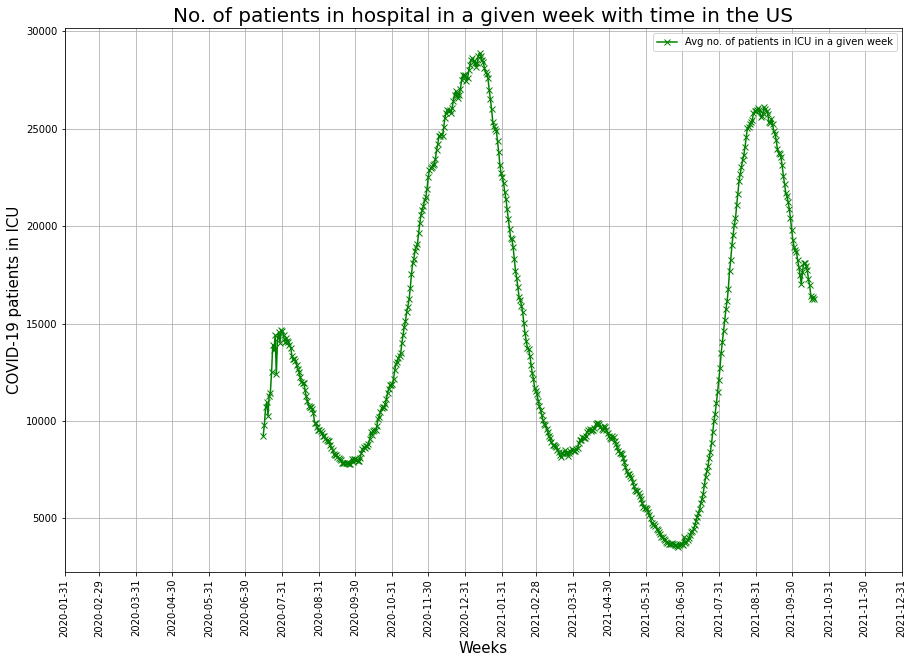

In [132]:
#plot to demostrate no. of patients in ICU in a given week with time in the US

x_axis4 = df2_USA["date"]
y_axis4 = df2_USA["icu_patients"]

plt.figure(figsize=(15,10))
plt.plot(x_axis4,y_axis4, marker ='x', color='green', label= "Avg no. of patients in ICU in a given week")
plt.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("No. of patients in hospital in a given week with time in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("COVID-19 patients in ICU", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot9_USA.png")
plt.show()

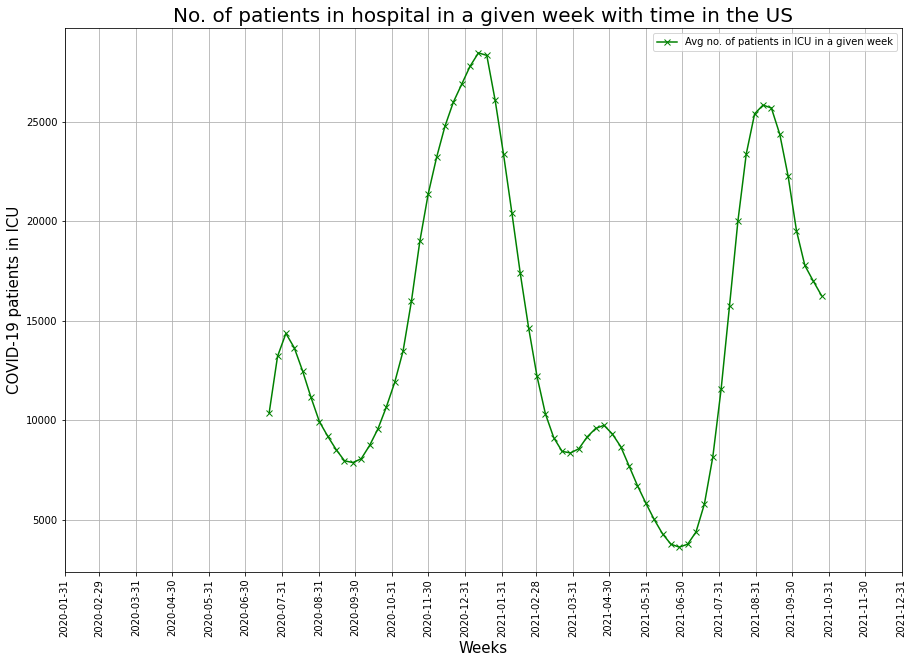

In [133]:
#plot to demostrate no. of patients in ICU in a given week with time in the US

x_axis4 = df1_USA["date"]
y_axis4 = df1_USA["icu_patients"]

plt.figure(figsize=(15,10))
plt.plot(x_axis4,y_axis4, marker ='x', color='green', label= "Avg no. of patients in ICU in a given week")
plt.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("No. of patients in hospital in a given week with time in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("COVID-19 patients in ICU", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot4_USA.png")
plt.show()

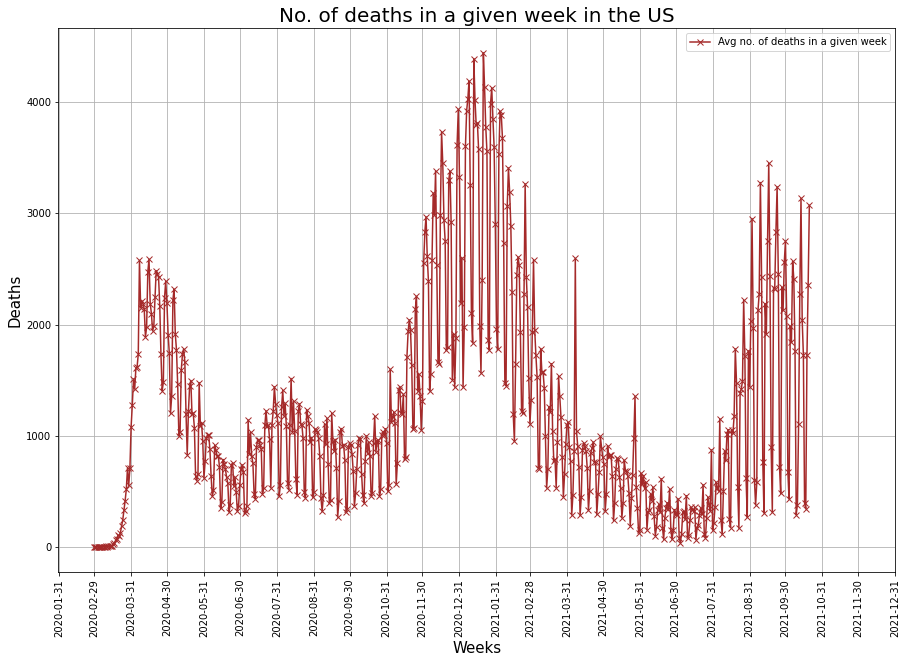

In [134]:
#plot to demostrate no. of deaths in a given week in the US

x_axis5 = df2_USA["date"]
y_axis5 = df2_USA["new_deaths"]

plt.figure(figsize=(15,10))
plt.plot(x_axis5,y_axis5, marker ='x', color='brown', label= "Avg no. of deaths in a given week")
plt.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("No. of deaths in a given week in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("Deaths", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot10_USA.png")
plt.show()

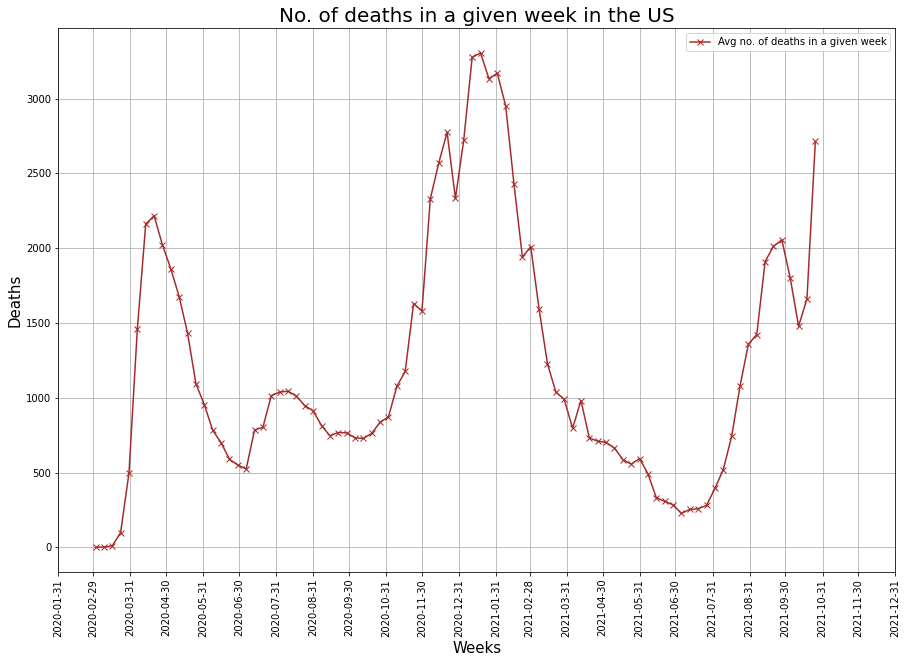

In [135]:
#plot to demostrate no. of deaths in a given week in the US

x_axis5 = df1_USA["date"]
y_axis5 = df1_USA["new_deaths"]

plt.figure(figsize=(15,10))
plt.plot(x_axis5,y_axis5, marker ='x', color='brown', label= "Avg no. of deaths in a given week")
plt.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("No. of deaths in a given week in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("Deaths", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot5_USA.png")
plt.show()

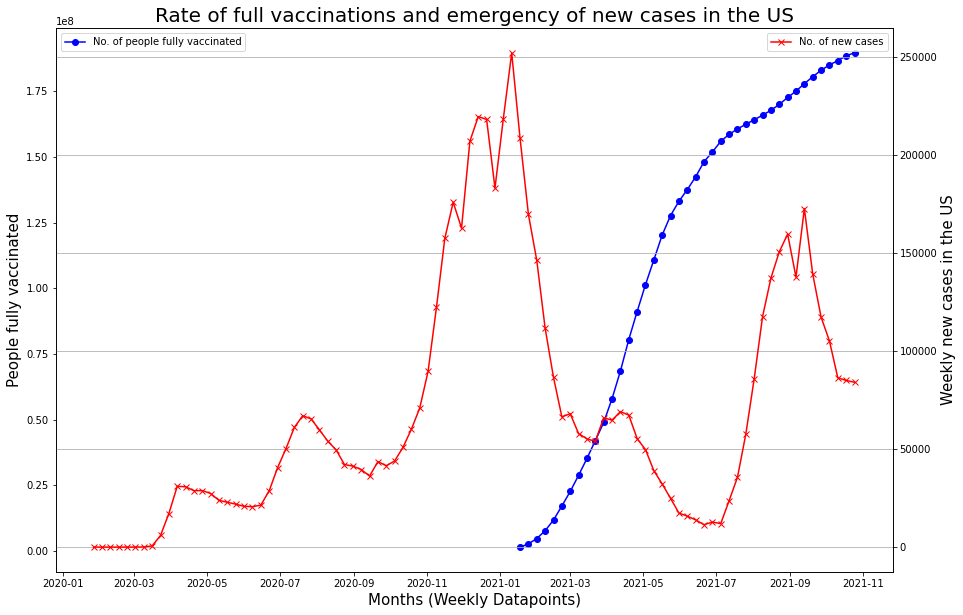

In [105]:
#plot to demostrate rate of full vaccinations and emergency of new cases in the US

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,10))

x_axis1 = df1_USA["date"]
y_axis1 = df1_USA["people_fully_vaccinated"]


ax.plot(x_axis1,y_axis1, marker ='o', color='blue', label="No. of people fully vaccinated")
ax.set_xlabel("Months (Weekly Datapoints)", fontsize = 15)
ax.set_ylabel("People fully vaccinated", fontsize = 15)
ax.legend(loc="upper left")

#plot to demostrate variation in new cases with time in the US

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

y_axis2 = df1_USA["new_cases"]

ax2.plot(x_axis1,y_axis2, marker ='x', color='red', label= "No. of new cases")
ax2.set_ylabel("Weekly new cases in the US", fontsize = 15)
ax2.legend(loc="upper right")

# Create title and labels for the X and Y axis
plt.title("Rate of full vaccinations and emergency of new cases in the US", fontsize = 20)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/vax_n_new cases.png")
plt.show()

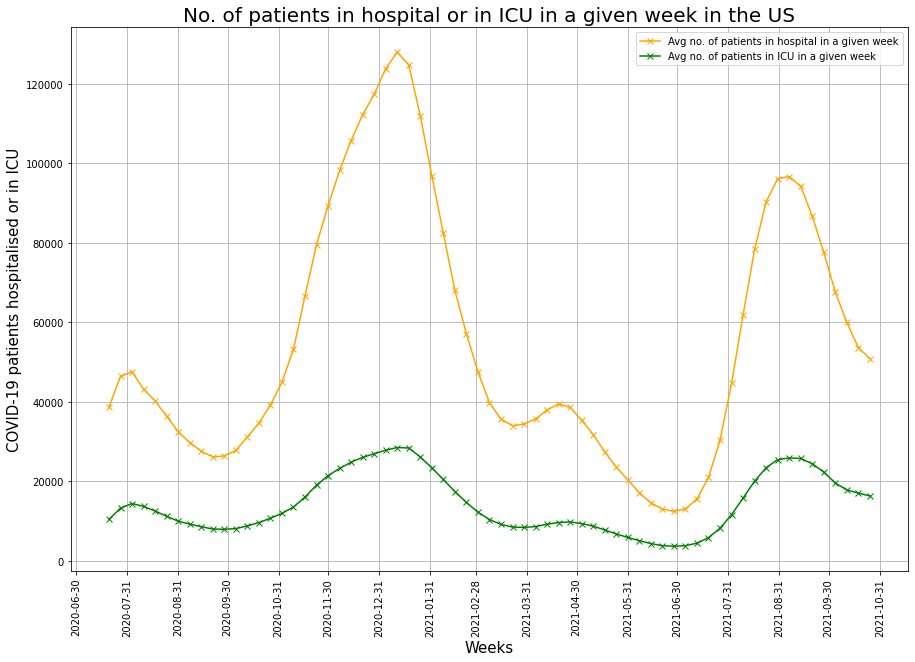

In [110]:
#plot to demostrate hospitalisation vs ICU patients on the same scale

#plot to demostrate no. of patients in hospital in a given week with time in the US

x_axis3 = df1_USA["date"]
y_axis3 = df1_USA["hosp_patients"]

plt.figure(figsize=(15,10))
plt.plot(x_axis3,y_axis3, marker ='x', color='orange', label= "Avg no. of patients in hospital in a given week")
plt.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("No. of patients in hospital or in ICU in a given week in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("COVID-19 patients hospitalised or in ICU", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

#plot to demostrate no. of patients in ICU in a given week with time in the US

x_axis4 = df1_USA["date"]
y_axis4 = df1_USA["icu_patients"]

plt.plot(x_axis4,y_axis4, marker ='x', color='green', label= "Avg no. of patients in ICU in a given week")

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/hosp_n_ICU.png")
plt.show()

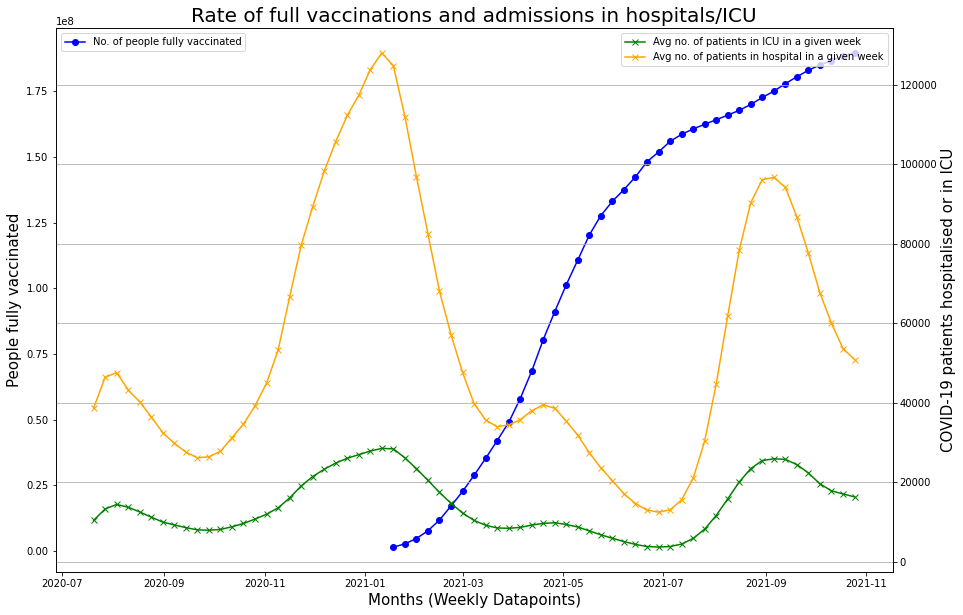

In [120]:
#plot to demostrate rate of full vaccinations and hospitalisation/ICU admissions in the US

# Create title and labels for the X and Y axis

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,10))

x_axis1 = df1_USA["date"]
y_axis1 = df1_USA["people_fully_vaccinated"]

ax.plot(x_axis1,y_axis1, marker ='o', color='blue', label="No. of people fully vaccinated")
ax.set_xlabel("Months (Weekly Datapoints)", fontsize = 15)
ax.set_ylabel("People fully vaccinated", fontsize = 15)
ax.legend(loc="upper left")
plt.title("Rate of full vaccinations and admissions in hospitals/ICU", fontsize = 20)


# ax.xticks(pd.period_range('2020-01', periods=24, freq='M'), rotation="vertical")

#plot to demostrate variation in new cases with time in the US
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

y_axis3 = df1_USA["hosp_patients"]
y_axis4 = df1_USA["icu_patients"]

ax2.plot(x_axis1,y_axis4, marker ='x', color='green', label= "Avg no. of patients in ICU in a given week")
ax2.plot(x_axis1,y_axis3, marker ='x', color='orange', label= "Avg no. of patients in hospital in a given week")
ax2.set_ylabel("COVID-19 patients hospitalised or in ICU", fontsize = 15)
ax2.legend(loc="upper right")

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/vax_n_hosp_or_ICU.png")
plt.show()

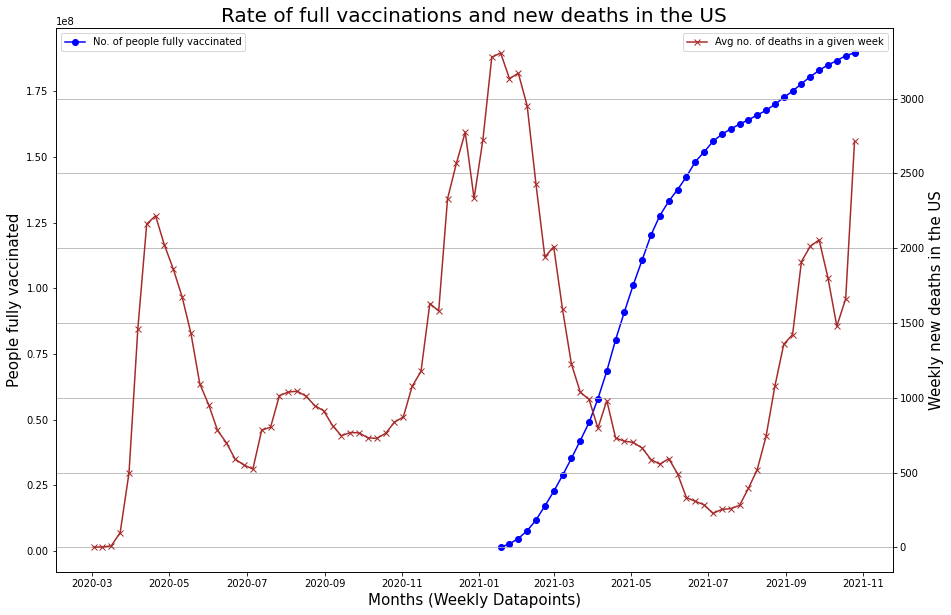

In [119]:
#plot to demostrate rate of full vaccinations and new deaths in the US

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,10))

x_axis1 = df1_USA["date"]
y_axis1 = df1_USA["people_fully_vaccinated"]


ax.plot(x_axis1,y_axis1, marker ='o', color='blue', label="No. of people fully vaccinated")
ax.set_xlabel("Months (Weekly Datapoints)", fontsize = 15)
ax.set_ylabel("People fully vaccinated", fontsize = 15)
ax.legend(loc="upper left")

#plot to demostrate variation in new deaths in the US

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

y_axis5 = df1_USA["new_deaths"]

ax2.plot(x_axis1,y_axis5, marker ='x', color='brown', label= "Avg no. of deaths in a given week")
ax2.set_ylabel("Weekly new deaths in the US", fontsize = 15)
ax2.legend(loc="upper right")

# Create title and labels for the X and Y axis
plt.title("Rate of full vaccinations and new deaths in the US", fontsize = 20)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/vax_n_new deaths.png")
plt.show()